## Task: To calculate Inertia for the given dataset from scratch

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("clustering.csv")
data.head()

,label,x,y
0,2,94,81
1,1,1,12
2,2,62,80
3,2,92,64
4,2,83,64


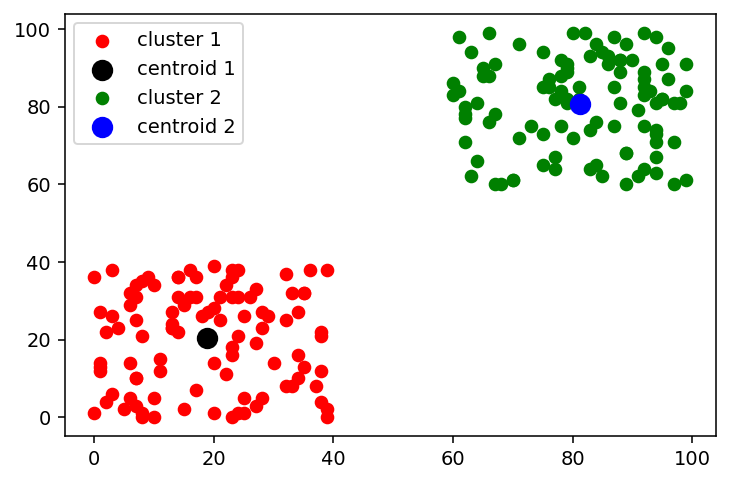

In [3]:
#plotting clusters
plt.figure(dpi=140)

#cluster1 and its centroid
cluster1 = data[data['label'] == 1]
plt.scatter(cluster1['x'],cluster1['y'], color='red', label ='cluster 1')
plt.scatter(cluster1['x'].mean(), cluster1['y'].mean(), s=100, color='black', label='centroid 1')

#cluster2 and its centroid
cluster2 = data[data['label']==2]
plt.scatter(cluster2['x'],cluster2['y'], color='green', label ='cluster 2')
plt.scatter(cluster2['x'].mean(),cluster2['y'].mean() ,s=100, label = 'centroid 2', color = 'blue')

plt.legend()
plt.show()

Calculating Inertia of clusters

**Steps to Calculate Inertia:**
 
 1.   define a function to calculate eucledian distance

 2.   calculate distance of every point in cluster 1 from it's centroid

 3.   calculate distance of every point in cluster 2 from it's centroid
 
 4.   calculate Inertia

In [4]:
### Step1: Defining a function for "euclid" to calculate distance between two points

def euclid(pt1, pt2):
    '''
    pt1, pt2: two points/coordinates to calculate distance between, must be of same dimension
    returns the distance between the two points
    '''
    diff = np.subtract(pt1,pt2)
    sq = np.square(diff)        
    summ = np.sum(sq)           
    dist = np.sqrt(summ)
    return dist

    

In [5]:
### testing function
print(euclid([5,5],[10,10]))
print(euclid([1,3],[10,12]))

7.0710678118654755
12.727922061357855


#### Expected outcome: 

<img src="images/image2.png" >

In [6]:
### Step2: to calculate distance within a single cluster

def Inertia(data):
    '''
    given the complete data points with with cluster target(labels), calculate Inertia
    Hint: 
    1. Identify number of clusters
    2. For each cluster
        a. calculate centroid
        b. use the function : "euclid"
        c. calculate total sum within that cluster
    3. Return inertia
    '''
    clusters = len(data['label'].unique())                  # detedcting number of clusters
    ith_cluster = []                                        # sistance within ith cluster

    for i in range(clusters):
        cluster_data = data[data['label']==i].values        # isolating cluster
        centroid = np.sum(cluster_data, axis=0)             # Calculating centroid
    
        distance_in_cluster = []                            # distacne of a point within a cluster
        for i in range(cluster_data.shape[0]):
            distance = euclid(centroid,cluster_data[i,:])
            distance_in_cluster.append(distance)
    
        total_distance = np.sum(distance_in_cluster)        
        ith_cluster.append(total_distance)
   
    inertia = sum(ith_cluster)                              # summing up distance within all clusters
    return inertia

In [7]:
Inertia(data)

274465.42619260855

**Expected Outcome**

<img src="images/image3.png">